In [1]:
import pandas as pd 

In [3]:
NetflixDF = pd.read_csv('/home/rafnaves/estudos/rocketseat/IA/netflix/netflix daily top 10.csv')

## Dados Iniciais

In [4]:
NetflixDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [5]:
NetflixDF.head(5)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


## Extraindo o periodo de Tempo

In [8]:
NetflixDF['As of'] = NetflixDF['As of'].astype('datetime64[ns]')
NetflixDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   object        
 3   Last Week Rank        7100 non-null   object        
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Exclusive     4599 non-null   object        
 7   Netflix Release Date  7100 non-null   object        
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 554.8+ KB


In [11]:
NetflixDF['As of'].min(), NetflixDF['As of'].max()

(Timestamp('2020-04-01 00:00:00'), Timestamp('2022-03-11 00:00:00'))

## Dados Nulos

In [12]:
print(NetflixDF.count())

As of                   7100
Rank                    7100
Year to Date Rank       7100
Last Week Rank          7100
Title                   7100
Type                    7100
Netflix Exclusive       4599
Netflix Release Date    7100
Days In Top 10          7100
Viewership Score        7100
dtype: int64


In [15]:
print(NetflixDF.isnull())

      As of   Rank  Year to Date Rank  Last Week Rank  Title   Type  \
0     False  False              False           False  False  False   
1     False  False              False           False  False  False   
2     False  False              False           False  False  False   
3     False  False              False           False  False  False   
4     False  False              False           False  False  False   
...     ...    ...                ...             ...    ...    ...   
7095  False  False              False           False  False  False   
7096  False  False              False           False  False  False   
7097  False  False              False           False  False  False   
7098  False  False              False           False  False  False   
7099  False  False              False           False  False  False   

      Netflix Exclusive  Netflix Release Date  Days In Top 10  \
0                 False                 False           False   
1                

In [16]:
print(NetflixDF.isnull().sum())


As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64


In [14]:
NetflixDF.isnull().sum().sum()

2501

## Outliers


In [18]:
# Remoção de Valores Nulos
NetflixDF.dropna(axis=0, inplace=True)
NetflixDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4599 entries, 0 to 7096
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 4599 non-null   datetime64[ns]
 1   Rank                  4599 non-null   int64         
 2   Year to Date Rank     4599 non-null   object        
 3   Last Week Rank        4599 non-null   object        
 4   Title                 4599 non-null   object        
 5   Type                  4599 non-null   object        
 6   Netflix Exclusive     4599 non-null   object        
 7   Netflix Release Date  4599 non-null   object        
 8   Days In Top 10        4599 non-null   int64         
 9   Viewership Score      4599 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 395.2+ KB


<Axes: >

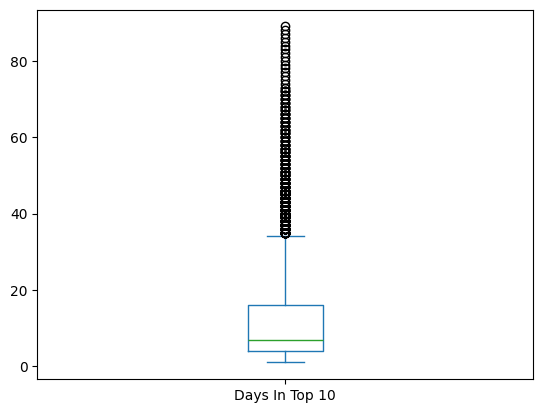

In [20]:
NetflixDF.plot.box(column='Days In Top 10')


In [ ]:
Q1 = NetflixDF['Days In Top 10'].quantile(0.25)
Q3 = NetflixDF['Days In Top 10'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
limite_inferior, limite_superior

(-14.0, 34.0)

In [33]:
outliers = NetflixDF[(NetflixDF['Days In Top 10'] < limite_inferior) | (NetflixDF['Days In Top 10'] > limite_superior)]
outliers

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
269,2020-04-27,10,6,4,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",35,301
308,2020-05-01,9,8,5,Ozark,TV Show,Yes,"Jul 21, 2017",35,244
318,2020-05-02,9,9,6,Ozark,TV Show,Yes,"Jul 21, 2017",36,246
379,2020-05-08,10,-,9,Ozark,TV Show,Yes,"Jul 21, 2017",37,247
409,2020-05-11,10,-,-,Ozark,TV Show,Yes,"Jul 21, 2017",38,248
...,...,...,...,...,...,...,...,...,...,...
7053,2022-03-07,4,3,4,Love is Blind,TV Show,Yes,"Feb 13, 2020",42,288
7063,2022-03-08,4,4,4,Love is Blind,TV Show,Yes,"Feb 13, 2020",43,295
7074,2022-03-09,5,4,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",44,301
7085,2022-03-10,6,5,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",45,306


<Axes: >

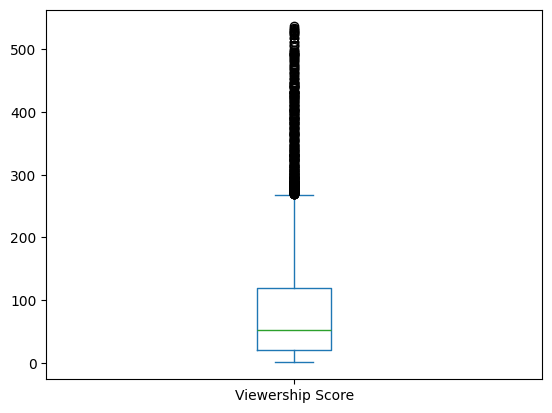

In [22]:
NetflixDF.plot.box(column='Viewership Score')


In [34]:
Q1 = NetflixDF['Viewership Score'].quantile(0.25)
Q3 = NetflixDF['Viewership Score'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
limite_inferior, limite_superior



(-127.5, 268.5)

In [35]:
outliers = NetflixDF[(NetflixDF['Viewership Score'] < limite_inferior) | (NetflixDF['Viewership Score'] > limite_superior)]
outliers

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
193,2020-04-20,4,3,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",28,273
204,2020-04-21,5,4,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",29,279
215,2020-04-22,6,5,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",30,284
226,2020-04-23,7,6,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",31,288
236,2020-04-24,7,7,2,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",32,292
...,...,...,...,...,...,...,...,...,...,...
7053,2022-03-07,4,3,4,Love is Blind,TV Show,Yes,"Feb 13, 2020",42,288
7063,2022-03-08,4,4,4,Love is Blind,TV Show,Yes,"Feb 13, 2020",43,295
7074,2022-03-09,5,4,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",44,301
7085,2022-03-10,6,5,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",45,306
